In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv(r'C:\Users\GIRINATH\Downloads\Alcohol_Sales.csv',parse_dates=['DATE'], index_col='DATE')

In [52]:
df.head(10)

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
1992-06-01,4529
1992-07-01,4466
1992-08-01,4137
1992-09-01,4126


In [51]:
# Plotting the time series data

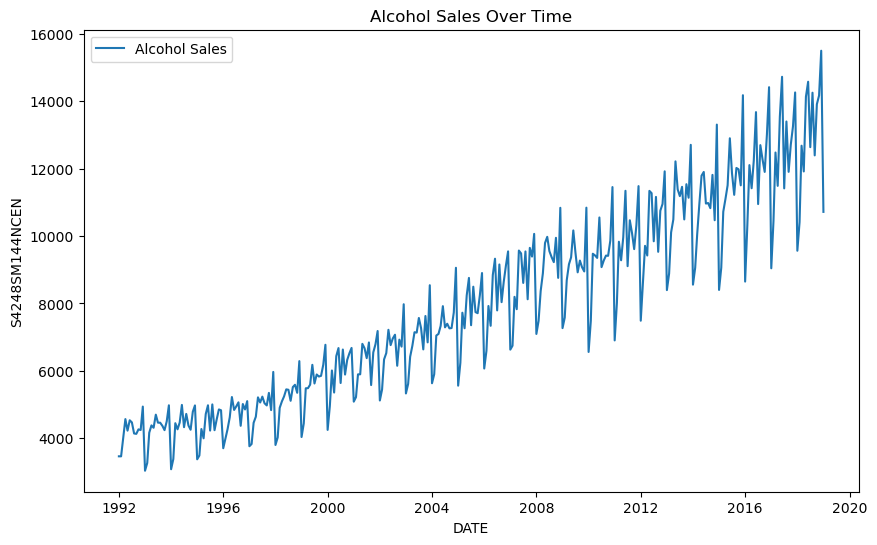

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df, label='Alcohol Sales')
plt.title('Alcohol Sales Over Time')
plt.xlabel('DATE')
plt.ylabel('S4248SM144NCEN')
plt.legend()
plt.show()

In [50]:
# Checking stationarity with Augmented Dickey-Fuller test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is non-stationary")

adf_test(df['S4248SM144NCEN'])

ADF Statistic: 2.037405
p-value: 0.998720
The data is non-stationary


In [19]:
df_diff = df.diff().dropna()

In [20]:
df_diff

,S4248SM144NCEN
DATE,
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
1992-06-01,308.0
...,...
2018-09-01,-1861.0
2018-10-01,1518.0
2018-11-01,260.0


In [22]:
model = ARIMA(df['S4248SM144NCEN'], order=(5,1,0)) 
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         S4248SM144NCEN   No. Observations:                  325
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2696.108
Date:                Wed, 25 Sep 2024   AIC                           5404.217
Time:                        14:00:59   BIC                           5426.901
Sample:                    01-01-1992   HQIC                          5413.271
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7379      0.045    -16.578      0.000      -0.825      -0.651
ar.L2         -0.5999      0.073     -8.167      0.000      -0.744      -0.456
ar.L3         -0.4727      0.074     -6.399      0.0

In [25]:
forecast_obj = model_fit.get_forecast(steps=12) 
forecast = forecast_obj.predicted_mean 
conf_int = forecast_obj.conf_int()      


In [26]:
forecast_obj

In [27]:
forecast

2019-02-01    13355.736337
2019-03-01    12865.816795
2019-04-01    13117.071596
2019-05-01    13846.708307
2019-06-01    14104.798196
2019-07-01    12471.954067
2019-08-01    13259.824591
2019-09-01    13055.808058
2019-10-01    13059.767081
2019-11-01    13528.362809
2019-12-01    13577.956012
2020-01-01    13023.169199
Freq: MS, Name: predicted_mean, dtype: float64

In [28]:
conf_int

,lower S4248SM144NCEN,upper S4248SM144NCEN
2019-02-01,11410.168121,15301.304554
2019-03-01,10854.508775,14877.124815
2019-04-01,11065.974984,15168.168208
2019-05-01,11752.399522,15941.017092
2019-06-01,12004.476048,16205.120344
2019-07-01,10352.167189,14591.740946
2019-08-01,10909.948629,15609.700553
2019-09-01,10639.816453,15471.799664
2019-10-01,10587.545260,15531.988902
2019-11-01,11000.378576,16056.347041


In [29]:
forecast_index = pd.date_range(start=df.index[-1], periods=12, freq='M')

In [30]:
forecast_index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [31]:
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

In [32]:
forecast_df

,Forecast
2019-01-31,NaN
2019-02-28,NaN
2019-03-31,NaN
2019-04-30,NaN
2019-05-31,NaN
2019-06-30,NaN
2019-07-31,NaN
2019-08-31,NaN
2019-09-30,NaN
2019-10-31,NaN


In [49]:
# Plot forecast with the original data

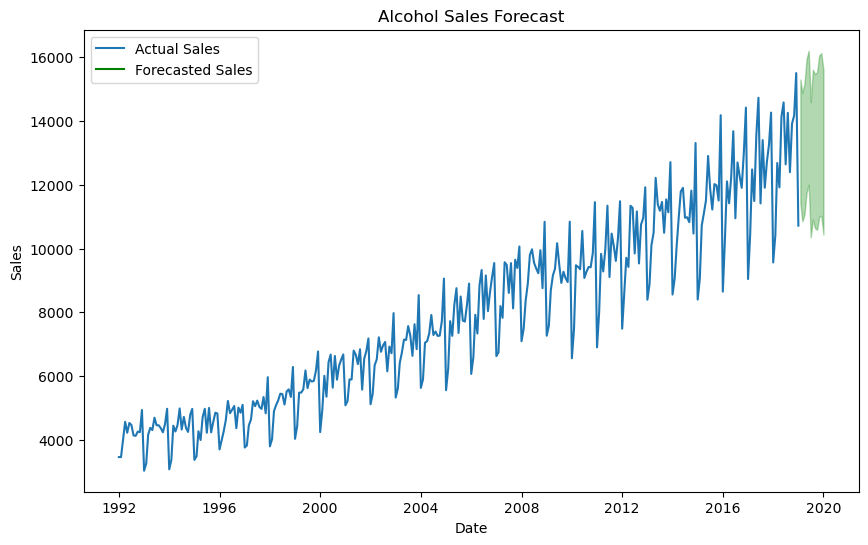

In [35]:
plt.figure(figsize=(10,6))
plt.plot(df, label='Actual Sales')
plt.plot(forecast_df, label='Forecasted Sales', color='green')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.3)
plt.title('Alcohol Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [48]:
# Evaluate the model

In [36]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

In [37]:
train_size

260

In [38]:
train,test

(            S4248SM144NCEN
 DATE                      
 1992-01-01            3459
 1992-02-01            3458
 1992-03-01            4002
 1992-04-01            4564
 1992-05-01            4221
 ...                    ...
 2013-04-01           10493
 2013-05-01           12218
 2013-06-01           11385
 2013-07-01           11186
 2013-08-01           11462
 
 [260 rows x 1 columns],
             S4248SM144NCEN
 DATE                      
 2013-09-01           10494
 2013-10-01           11540
 2013-11-01           11138
 2013-12-01           12709
 2014-01-01            8557
 ...                    ...
 2018-09-01           12396
 2018-10-01           13914
 2018-11-01           14174
 2018-12-01           15504
 2019-01-01           10718
 
 [65 rows x 1 columns])

In [40]:
model = ARIMA(train['S4248SM144NCEN'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))


In [41]:
model

In [42]:
model_fit

In [43]:
forecast

2013-09-01    10808.339522
2013-10-01    10959.708543
2013-11-01    11492.381127
2013-12-01    11266.183303
2014-01-01    11260.261779
                  ...     
2018-09-01    11222.669138
2018-10-01    11222.670478
2018-11-01    11222.664822
2018-12-01    11222.660499
2019-01-01    11222.664602
Freq: MS, Name: predicted_mean, Length: 65, dtype: float64

In [46]:
# Calculate mean squared error

In [47]:
error = mean_squared_error(test['S4248SM144NCEN'],forecast)
print(f'Mean Squared Error: {error}')

Mean Squared Error: 3078131.871467208
